In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
import os

In [2]:
from collections import defaultdict
from gensim import corpora, models, similarities

# plot projection of articles onto 2 axes/topics defined by the model; for models operating on tfidf-transformed inputs (LSI, RP)
def plot_axes_with_tfidf(x, y, model, corpus, tfidf, titles):
    """Plot each article title according to the projection of its text 
    into the given x and y topic axes of model.
    
    :param x: the index of the x axis to plot
    :param y: the index of the y axis to plot
    :param model: the gensim model to project into
    :param corpus: the gensim corpus of documents
    :param tfidf: a tfidf model for converting documents into tfidf space
    :param titles: a list of article titles
    """
    x_data = defaultdict(list) 
    y_data = defaultdict(list) 
    arts = defaultdict(list)  
    for title, doc in zip(titles, corpus):
        x_data[0].append((model[tfidf[doc]][x][1]))
        y_data[0].append((model[tfidf[doc]][y][1]))
        arts[0].append(title)
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ax.set_xlabel('Topic '+str(x), fontsize=14)
    ax.set_ylabel('Topic '+str(y), fontsize=14)
    plt.scatter(x_data[0], y_data[0], s=40)
    for art, x, y in zip(arts[0], x_data[0], y_data[0]):
        ax.annotate(str(art), xy=(x, y), xycoords='data', xytext=(1, 1), 
        textcoords='offset points', size=10)
    
        
# plot projection of articles onto 2 axes/topics defined by the model; for models operating on original corpus (LDA, HDP)
def plot_axes(x, y, model, corpus, titles):
    """Plot each article title according to the projection of its text 
    into the given x and y topic axes of model.
    
    :param x: the index of the x axis to plot
    :param y: the index of the y axis to plot
    :param model: the gensim model to project into
    :param corpus: the gensim corpus of documents
    :param titles: a list of article titles
    """
    x_data = defaultdict(list) 
    y_data = defaultdict(list) 
    arts = defaultdict(list)  
    for title, doc in zip(titles, corpus):
        x_data[0].append((model[doc][x][1]))
        y_data[0].append((model[doc][y][1]))
        arts[0].append(title)
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ax.set_xlabel('Topic '+str(x), fontsize=14)
    ax.set_ylabel('Topic '+str(y), fontsize=14)
    plt.scatter(x_data[0], y_data[0], s=40)
    for art, x, y in zip(arts[0], x_data[0], y_data[0]):
        ax.annotate(str(art), xy=(x, y), xycoords='data', xytext=(1, 1), 
        textcoords='offset points', size=10)  

In [3]:
os.chdir('../data/')
# Read dataframe
#input_fname="AutismParentMagazine-posts-tokens.csv"
input_fname="articles-n-forums-posts.csv"

df = pd.read_csv(input_fname,index_col=0)
df.head(2)


,category,href,source,text,title,tokens
0,category-applied-behavior-analysis-aba,https://www.autismparentingmagazine.com/autism...,https://www.autismparentingmagazine.com/,For children with autism spectrum disorder (AS...,"Autism, Head Banging and other Self Harming Be...","['for', 'children', 'with', 'autism', 'spectru..."
1,category-applied-behavior-analysis-aba,https://www.autismparentingmagazine.com/high-q...,https://www.autismparentingmagazine.com/,Dr. Stephen Shore once said “If you’ve met one...,High Quality ABA Treatment: What Every Parent...,"['dr', 'stephen', 'shore', 'once', 'said', 'if..."


In [4]:
import pickle
# Read models
corpus = pickle.load(open("corpus.save", "rb"))
tfidf = models.TfidfModel.load('tfidf.save')
lsimodel = models.LsiModel.load('lsi-model.save')


In [5]:
# Plot topics
titles = df['title']
categories = df['category']

topics_articles=[]
topics_forums=[]
for category,title, doc in zip(categories,titles, corpus):
    top_topic=max(lsimodel[tfidf[doc]],key=lambda x:x[1])
    if category == 'forums':
        topics_forums.append(top_topic)
    else:
        topics_articles.append(top_topic)





In [6]:
print(df.loc[0])
lsimodel.show_topic(289,topn=10)

category               category-applied-behavior-analysis-aba
href        https://www.autismparentingmagazine.com/autism...
source               https://www.autismparentingmagazine.com/
text        For children with autism spectrum disorder (AS...
title       Autism, Head Banging and other Self Harming Be...
tokens      ['for', 'children', 'with', 'autism', 'spectru...
Name: 0, dtype: object


[('delays', 0.080686782167673582),
 ('seeing', -0.077652423741263563),
 ('head', 0.074499926236749336),
 ('hair', 0.072249148020062492),
 ('rather', -0.07195653748863208),
 ('whether', -0.071462488055082152),
 ('learning', -0.07140853944117255),
 ('programs', -0.069267157727060283),
 ('journey', -0.065877723775002839),
 ('using', 0.064503874896842089)]

In [7]:
topic_index=0
topn=5 #top five words in that topic
lsimodel.show_topic(topic_index, topn=topn)

[('behavior', 0.18064146052411476),
 ('son', 0.14968967605559619),
 ('diagnosis', 0.13929711658835373),
 ('autism', 0.12730052941049244),
 ('child', 0.12727552507717477)]

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from matplotlib import gridspec
import numpy as np


In [9]:
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True

plt.rcParams.update({'font.size': 24})

nbins=300 #300 topics


fig = plt.figure()
#fig=plt.figure(figsize=(2,1))
#fig.set_size_inches(6.6,3.3)
gs = gridspec.GridSpec(2, 1)
#plt.subplots_adjust(left=0.1,right=1.0,bottom=0.17,top=0.9)


#plt.suptitle('Text length (words count)')
fig.text(0.04,0.5,'Distribution',va='center',rotation='vertical')

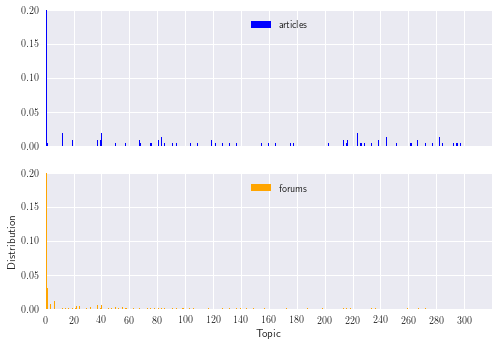

In [10]:
#X ticks

xmax=320
x=np.arange(0,xmax,20) #xtics
xx=np.arange(1,xmax,1)

# Panel 1
ax1=plt.subplot(gs[0])
ax1.set_xlim([0, xmax])
ax1.set_ylim([0,0.2])
ax1.set_xticks(x)
ax1.tick_params(labelbottom='off')    


#plt.ylabel('')
#Class 0
X=np.array(topics_articles)
n_articles,bins_articles,patches=plt.hist(X,nbins,normed=1,facecolor='blue',align='mid',label='articles')
plt.legend(bbox_to_anchor=(0.45, 0.95), loc=2, borderaxespad=0.)



# Panel 2
ax2=plt.subplot(gs[1])
ax2.set_xlim([0, xmax])
ax2.set_xticks(x)
ax2.set_ylim([0,0.2])

plt.ylabel('Distribution')
plt.xlabel('Topic')

#Class 1
X=np.array(topics_forums)
n_forums,bins_forums,patches=plt.hist(X,nbins,normed=1,facecolor='orange',align='mid',label='forums')
plt.legend(bbox_to_anchor=(0.45, 0.95), loc=2, borderaxespad=0.)


#plt.xlabel('Volume ratio (theor./expt.)')

plt.show()

In [11]:
# Find top 10 topics in articles and forums
print(len(bins_forums))
print(len(n_forums[0]))
#print(n_forums[0])
print(max(topics_forums))
print(max(topics_articles))

301
300
(299, 0.10660214852418985)
(299, 0.077503597396938337)


In [12]:
def mk_topic_presence(nn):
    from operator import itemgetter

    """gets the topic presence. The result is sorteed.
    nn refers to the output n of plt.hist, which contains the topic distribution for each bin"""
    topic_presence=[]
    for n in range(len(n_forums[0])):
        topic_presence.append((n,nn[0][n]))
    # Sort topic presence:
    sorted_topic_presence=sorted(topic_presence,key=itemgetter(1),reverse=True)
    return sorted_topic_presence

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
def print_topics(topic_presence_list):
    topn=10 #top five words in that topic
    for topic_presence in topic_presence_list[:5]:
        topic_index=topic_presence[0]
        topic=lsimodel.show_topic(topic_index, topn=topn)
        word_list=[]
        for word,score in topic:
            word_list.append(word)
        printmd('**Topic {}**: {}'.format(topic_index,', '.join(word_list)))


In [13]:
topic_presence_articles=mk_topic_presence(n_articles)
topic_presence_articles[:5]


[(0, 0.19313203636534926),
 (8, 0.10834236186348858),
 (25, 0.032973762306279165),
 (5, 0.032973762306279131),
 (12, 0.018842149889302377)]

In [14]:
topic_presence_forums=mk_topic_presence(n_forums)
topic_presence_forums[:5]

[(0, 0.66295387735167566),
 (1, 0.031754933621046651),
 (10, 0.015041810662601053),
 (5, 0.015041810662601039),
 (6, 0.011699186070911929)]

In [15]:
printmd("**Topics most present in articles**")
print_topics(topic_presence_articles)
printmd("**Topics most present in forums**")
print_topics(topic_presence_forums)

**Topics most present in articles**

**Topic 0**: behavior, son, diagnosis, autism, child, school, children, social, would, may

**Topic 8**: thank, continue, reading, asperger, medication, doctor, school, thanks, much, pediatrician

**Topic 25**: daughter, toilet, speech, food, reading, continue, services, medication, son, language

**Topic 5**: sensory, http, asperger, www, pediatrics, org, autistic, thank, com, aspergers

**Topic 12**: school, intervention, son, early, behaviors, speech, child, old, diagnosis, provide

**Topics most present in forums**

**Topic 0**: behavior, son, diagnosis, autism, child, school, children, social, would, may

**Topic 1**: discussion, related, started, old, violence, behavior, yr, aspergers, asperger, autism

**Topic 10**: thank, diagnosis, asperger, services, school, medication, behavior, toilet, development, needs

**Topic 5**: sensory, http, asperger, www, pediatrics, org, autistic, thank, com, aspergers

**Topic 6**: http, recommendations, pediatrics, treatment, org, area, development, www, services, diagnosis